<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week13_InterpretNeuralNetworkModels_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13
# Interpret Neural Network Models

Neural Network models are considered as "black-box models" for its lack of interpretability, due to the fact that they use a large number of parameters and the data are processed through multiple layers. Even though neural networks can create great results when they are working properly, it is often difficult to predict when it will go wrong, and what kind of mistakes the models tend to make. Therefore, it is crucial that practioners are aware of its limitations and learn how to interpret neural network models, especially when they work in sensitive areas such as finance, self-driving, or health.

This week, we will look at two examples that help us understand neural networks: visualing convolutional filters and creating adversarial attacks.

# Example 1: Visualizing Convolution Filters

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png" width="800">

In [ ]:
# Load the mnist dataset.


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)
     



# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

2.9.2
11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
# Train the above CNN (LeNet5) on MNIST

lenet5 = tf.keras.Sequential()

lenet5.add(tf.keras.layers.Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28,28,1)))
lenet5.add(tf.keras.layers.MaxPool2D())
lenet5.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu'))
lenet5.add(tf.keras.layers.MaxPool2D())
lenet5.add(tf.keras.layers.Flatten())
lenet5.add(tf.keras.layers.Dense(120, activation='relu'))
lenet5.add(tf.keras.layers.Dense(84, activation='relu'))
lenet5.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
lenet5.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [ ]:
lenet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
lenet5.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 16s 4ms/step - loss: 0.2003 - accuracy: 0.9380 - val_loss: 0.0674 - val_accuracy: 0.9810
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0503 - val_accuracy: 0.9852
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0418 - val_accuracy: 0.9875
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0348 - val_accuracy: 0.9915
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0426 - val_accuracy

In [ ]:
# Extract the 6 filters for the first layer
parameters = lenet5.layers[0].weights
weights, biases = parameters
print(weights.shape)

(5, 5, 1, 6)


In [ ]:
# Extract a filter
filter_index = 1
filter = weights.numpy()[:, :, 0, filter_index]
print(filter)

[[-0.16190931  0.02481722 -0.16147995  0.05148718  0.22565639]
 [-0.04684526  0.2658234   0.31595385 -0.04982785 -0.18201813]
 [ 0.24066366  0.14794403  0.06590153  0.16267943 -0.12195243]
 [-0.17668265 -0.5565401  -0.31660274 -0.05880074  0.13396949]
 [-0.02601517 -0.04725735  0.0215636   0.19395047  0.10744259]]


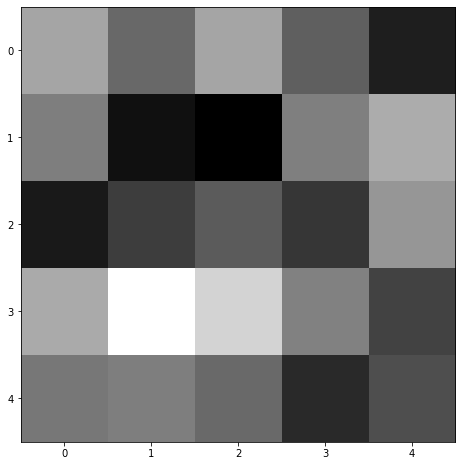

In [ ]:
# Display filters as images
plt.imshow(filter, cmap="Greys")

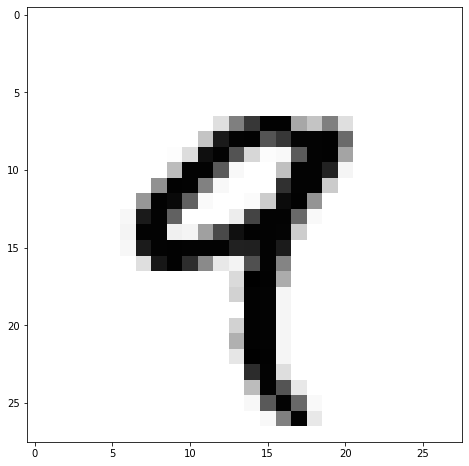

In [ ]:
# Choose an image from the data set.
index = 4
image = x_train[index]
plt.imshow(image, cmap="Greys")

In [ ]:
# Computer the convolution of the image with each filter.

# row indices: 0 - 4
# column indices: 0 - 4
sum = 0
for i in range(0, 5):
    for j in range(0, 5):
        sum += image[i, j] * filter[i, j]
print(sum)



0.0


In [ ]:
result.numpy()[0, 0, 0, 0]

0.0

(1, 28, 28, 1)


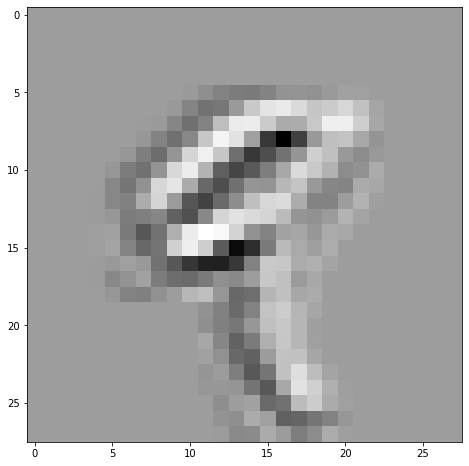

In [ ]:
# Verify the results with tf.nn.convolution.
result = tf.nn.convolution(image.reshape([1, 28, 28, 1]).astype('float32'), filter.reshape([5, 5, 1, 1]), padding="SAME")
print(result.shape)
plt.imshow(result.numpy().reshape([28, 28]), cmap="Greys")

# Example 2: Create Adversarial Attacks

Reference: [TensorFlow Tutorial](https://www.tensorflow.org/tutorials/generative/adversarial_fgsm)

## What is an adversarial example?

Adversarial examples are specialised inputs created with the purpose of confusing a neural network, resulting in the misclassification of a given input. These notorious inputs are indistinguishable to the human eye, but cause the network to fail to identify the contents of the image. There are several types of such attacks, however, here the focus is on the fast gradient sign method attack, which is a *white box* attack whose goal is to ensure misclassification. A white box attack is where the attacker has complete access to the model being attacked. One of the most famous examples of an adversarial image shown below is taken from the aforementioned paper.

![Adversarial Example](https://www.tensorflow.org/static/tutorials/generative/images/adversarial_example.png)

Here, starting with the image of a panda, the attacker adds small perturbations (distortions) to the original image, which results in the model labelling this image as a gibbon, with high confidence. The process of adding these perturbations is explained below.

## Fast gradient sign method
The fast gradient sign method works by using the gradients of the neural network to create an adversarial example. For an input image, the method uses the gradients of the loss with respect to the input image to create a new image that maximises the loss. This new image is called the adversarial image. This can be summarised using the following expression:
$$adv\_x = x + \epsilon*\text{sign}(\nabla_xJ(\theta, x, y))$$

where 

*   adv_x : Adversarial image.
*   x : Original input image.
*   y : Original input label.
*   $\epsilon$ : Multiplier to ensure the perturbations are small.
*   $\theta$ : Model parameters.
*   $J$ : Loss.

An intriguing property here, is the fact that the gradients are taken with respect to the input image. This is done because the objective is to create an image that maximises the loss. A method to accomplish this is to find how much each pixel in the image contributes to the loss value, and add a perturbation accordingly. This works pretty fast because it is easy to find how each input pixel contributes to the loss by using the chain rule and finding the required gradients. Hence, the gradients are taken with respect to the image. In addition, since the model is no longer being trained (thus the gradient is not taken with respect to the trainable variables, i.e., the model parameters), and so the model parameters remain constant. The only goal is to fool an already trained model.

So let's try and fool a pretrained model. In this tutorial, the model is [MobileNetV2](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/applications/MobileNetV2) model, pretrained on [ImageNet](http://www.image-net.org/).

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

14536120/14536120 [==============================] - 1s 0us/step


In [6]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  print(decode_predictions(probs, top=5))
  return decode_predictions(probs, top=1)[0][0]

## Original image
Let's use a sample image of a [Labrador Retriever](https://commons.wikimedia.org/wiki/File:YellowLabradorLooking_new.jpg) by Mirko [CC-BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) from Wikimedia Common and create adversarial examples from it. The first step is to preprocess it so that it can be fed as an input to the MobileNetV2 model.

In [7]:
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

1/1 [==============================] - 0s 19ms/step


Let's have a look at the image.

[[('n02099712', 'Labrador_retriever', 0.41818547), ('n02109961', 'Eskimo_dog', 0.05535502), ('n02091244', 'Ibizan_hound', 0.03505687), ('n02099601', 'golden_retriever', 0.027119784), ('n02091831', 'Saluki', 0.018688833)]]


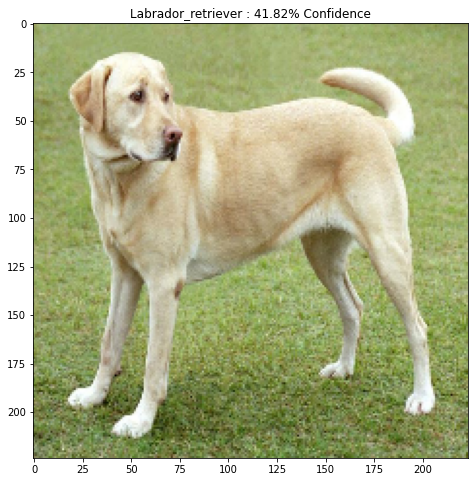

In [8]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

## Create the adversarial image

### Implementing fast gradient sign method
The first step is to create perturbations which will be used to distort the original image resulting in an adversarial image. As mentioned, for this task, the gradients are taken with respect to the image.

In [10]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

The resulting perturbations can also be visualised.

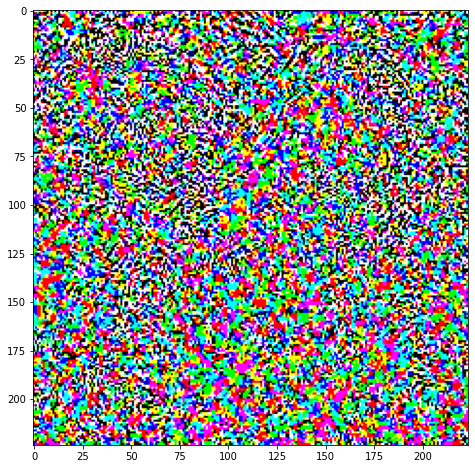

In [17]:
# Get the input label of the image.
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

Let's try this out for different values of epsilon and observe the resultant image. You'll notice that as the value of epsilon is increased, it becomes easier to fool the network. However, this comes as a trade-off which results in the perturbations becoming more identifiable.

In [18]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

1/1 [==============================] - 0s 20ms/step
[[('n02099712', 'Labrador_retriever', 0.41818547), ('n02109961', 'Eskimo_dog', 0.05535502), ('n02091244', 'Ibizan_hound', 0.03505687), ('n02099601', 'golden_retriever', 0.027119784), ('n02091831', 'Saluki', 0.018688833)]]


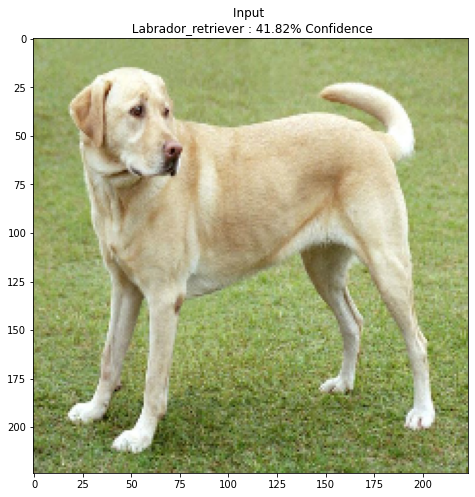

1/1 [==============================] - 0s 29ms/step
[[('n02091831', 'Saluki', 0.13078293), ('n02092339', 'Weimaraner', 0.08049393), ('n02091244', 'Ibizan_hound', 0.07680582), ('n02091134', 'whippet', 0.030978793), ('n02110806', 'basenji', 0.029733928)]]


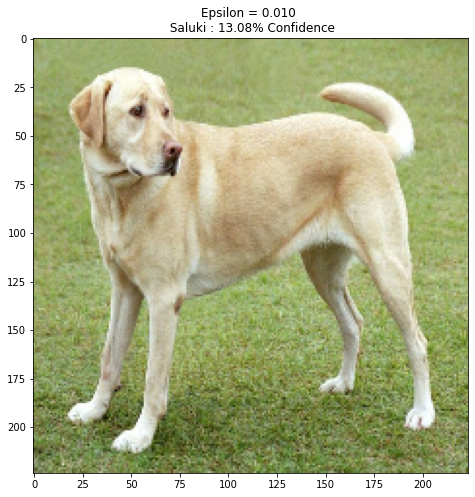

1/1 [==============================] - 0s 27ms/step
[[('n02092339', 'Weimaraner', 0.15125503), ('n02099849', 'Chesapeake_Bay_retriever', 0.049904518), ('n02091244', 'Ibizan_hound', 0.040509127), ('n02100583', 'vizsla', 0.035905752), ('n02093647', 'Bedlington_terrier', 0.024393834)]]


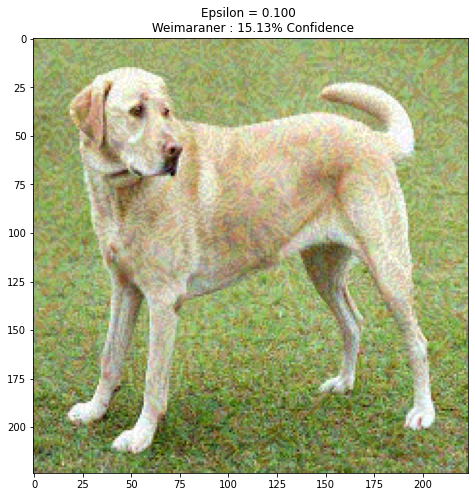

1/1 [==============================] - 0s 31ms/step
[[('n02092339', 'Weimaraner', 0.16582413), ('n02100583', 'vizsla', 0.06340604), ('n02093647', 'Bedlington_terrier', 0.04742121), ('n02099849', 'Chesapeake_Bay_retriever', 0.036148116), ('n01694178', 'African_chameleon', 0.02860169)]]


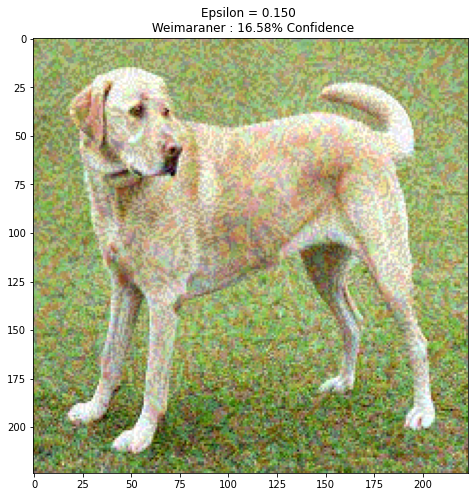

In [19]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])

## Next Steps:
- Create an adversarial example to MobileNet with a different image
- Create an adversarial example to the dense neural network we created for the MNIST dataset.

In [20]:
url = "https://cdn.britannica.com/92/152292-050-EAF28A45/Bald-eagle.jpg"
filename = "Bald-eagle.jpg"
image_path2 = tf.keras.utils.get_file(filename, url)
image_raw2 = tf.io.read_file(image_path2)
image2 = tf.image.decode_image(image_raw2)

image2 = preprocess(image2)
image_probs2 = pretrained_model.predict(image2)

1/1 [==============================] - 0s 49ms/step


[[('n01614925', 'bald_eagle', 0.83766025), ('n01608432', 'kite', 0.011616591), ('n01622779', 'great_grey_owl', 0.007572272), ('n01819313', 'sulphur-crested_cockatoo', 0.002797989), ('n01616318', 'vulture', 0.0020643063)]]


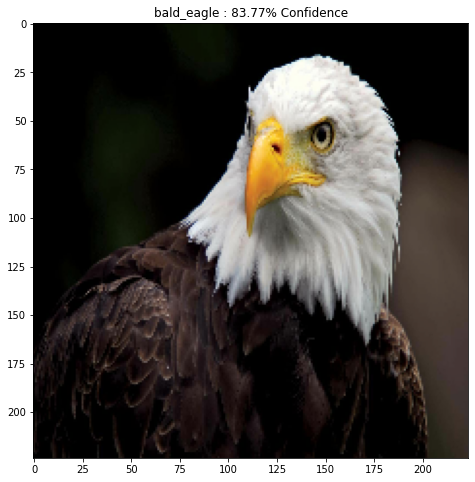

In [21]:
plt.figure()
plt.imshow(image2[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs2)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [28]:
# Find the index of the correct class
import numpy as np
temp = pretrained_model(image2)
np.argmax(temp.numpy()) # Result: 22
# temp.numpy()[0, 22] # Result: 0.837

0.8376602

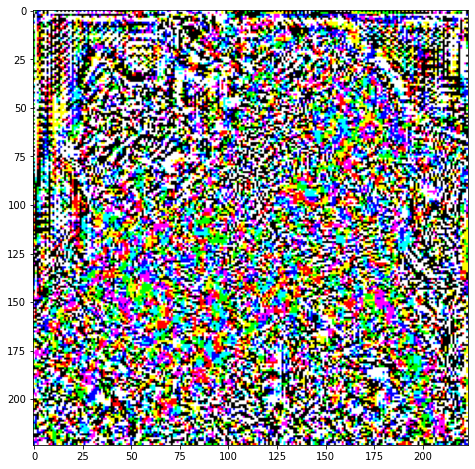

In [29]:
# Get the input label of the image.
index = 22
label = tf.one_hot(index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs2.shape[-1]))

perturbations = create_adversarial_pattern(image2, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

1/1 [==============================] - 0s 74ms/step
[[('n01614925', 'bald_eagle', 0.83766025), ('n01608432', 'kite', 0.011616591), ('n01622779', 'great_grey_owl', 0.007572272), ('n01819313', 'sulphur-crested_cockatoo', 0.002797989), ('n01616318', 'vulture', 0.0020643063)]]


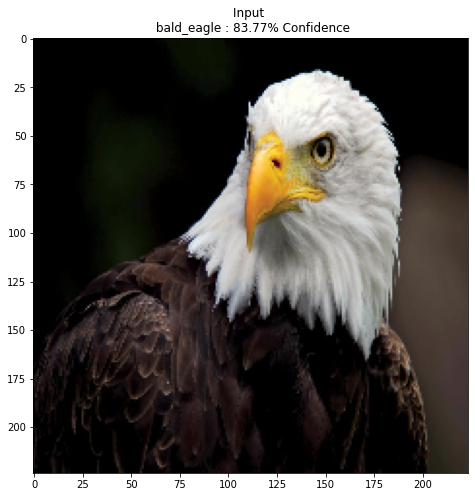

1/1 [==============================] - 0s 24ms/step
[[('n01614925', 'bald_eagle', 0.10076642), ('n01608432', 'kite', 0.035414793), ('n01622779', 'great_grey_owl', 0.023752715), ('n01818515', 'macaw', 0.01627517), ('n01819313', 'sulphur-crested_cockatoo', 0.010340712)]]


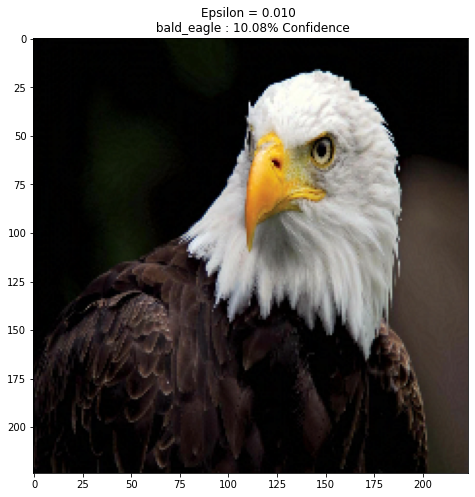

1/1 [==============================] - 0s 26ms/step
[[('n01818515', 'macaw', 0.09520091), ('n01622779', 'great_grey_owl', 0.09402599), ('n01820546', 'lorikeet', 0.05871933), ('n01614925', 'bald_eagle', 0.05330253), ('n01819313', 'sulphur-crested_cockatoo', 0.044791486)]]


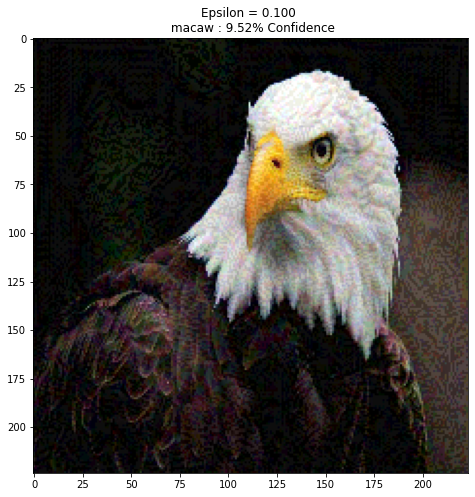

1/1 [==============================] - 0s 29ms/step
[[('n01622779', 'great_grey_owl', 0.16409409), ('n01818515', 'macaw', 0.038410824), ('n01819313', 'sulphur-crested_cockatoo', 0.027955169), ('n01817953', 'African_grey', 0.025490375), ('n01614925', 'bald_eagle', 0.022862678)]]


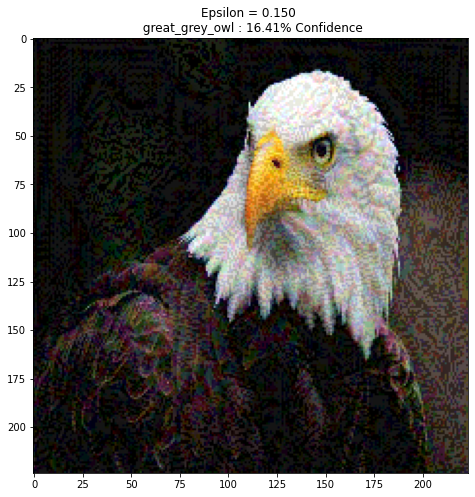

In [30]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image2 + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])